Parse genome annotation: abandoned, see 3_2_1

In [4]:
from dna_features_viewer import GraphicFeature, GraphicRecord
from foreground import get_foreground 
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.patches as patches
from matplotlib import colormaps

In [2]:
import pandas as pd
domains=pd.read_csv('nido-domains.csv')

In [9]:
colormaps['tab20'].colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.74117647

In [28]:
for i in colormaps.keys():
    print(i)

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
coolwarm_r
copper_r
cubehelix_r
flag_r
gist_earth_r
g

In [ ]:
fig_length=len(domains['genome_name'].unique())

(<Axes: >,
 ({GF(PF13245, 13640-14087 (-1)): 0,
   GF(PF00680, 15278-16004 (-1)): 0,
   GF(PF13087, 13118-13589 (-1)): 0,
   GF(PF00089, 9306-9825 (-1)): 0},
  {GF(PF00680, 15278-16004 (-1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(PF00089, 9306-9825 (-1)): {'feature_y': 0, 'annotation_y': 4.0},
   GF(PF13087, 13118-13589 (-1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(PF13245, 13640-14087 (-1)): {'feature_y': 0, 'annotation_y': 3.0}}))

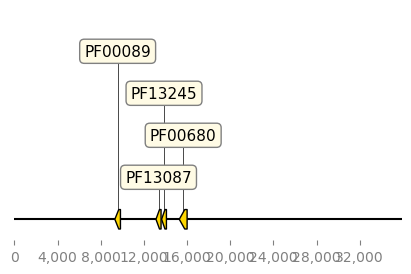

In [6]:

for i in domains.groupby('genome_name'):
    break
sequence_length=i[1].iloc[0]['genome_length']
features=[]
for _,d in i[1].iterrows():
    strand=+1 if d['strand']=='SENSE' else -1
    features.append(GraphicFeature(start=d['start'], end=d['end'], strand=strand, color="#ffd700",
                   label=d['domain_accession']))
record = GraphicRecord(sequence_length=sequence_length, features=features)
record.plot(figure_width=5)

In [4]:
plt.close('all')

In [21]:
def hide_axes(ax,genome_start_pos,genome_end_pos):
    #hack: since I don't~~~~~ didn't know how to erase axes around coordinates, draw a white box over them.
    # is that a ugly hack? yes. does it render well? also yes
    ax.add_patch(
     patches.Rectangle(
        (-100, -0.25),
        genome_start_pos,
        0.5,
        fill=True,      # remove background
        facecolor='white'
     ) ) 
    ax.add_patch(
     patches.Rectangle(
        (genome_end_pos, -0.25),
        sequence_length+100,
        0.5,
        fill=True,      # remove background
        facecolor='white'
     ) ) 

In [22]:

sample_size=10
c=0
sequence_length=42000
ref=21000
fig,ax=plt.subplots(sample_size,1,sharex=True,figsize=(30,sample_size*2))
for i,idf in domains.groupby('genome_name'):
    # sequence_length=idf.iloc[0]['genome_length']
    features=[]
    if (idf['domain_accession']=='PF00680').any():
        print(i)
        rdrp_start=idf[idf['domain_accession']=='PF00680'].iloc[0]['start']
        del_start=ref-rdrp_start
        for _,d in idf.iterrows():
            strand=+1 if d['strand']=='SENSE' else -1
            
            color= 'green' if d['domain_accession']=='PF00680' else 'grey'
            features.append(GraphicFeature(start=d['start']+del_start, end=d['end']+del_start, strand=strand, color=color,
                        label=d['domain_accession']))
        record = GraphicRecord(sequence_length=sequence_length, features=features)
        record.plot(ax=ax[c],figure_width=20)
        hide_axes(ax[c],0+del_start,idf.iloc[0]['genome_length']+del_start)
        c+=1
        if c>=sample_size:
            break
        
# fig.set_dpi(400)
fig.savefig('xxxx.svg')
plt.close('all')


AAbV||GBBW01007738
ACMV||MN961271
ACoV-WA1087||MK472067
ACoV-WA2028||MK472068
ACoV-WA3607||MK472070
ACoV_9203||KR902510
APRAV||KP026921
BPNV||KJ541759
BRV||AY427798
BRV||MF685025


True

In [5]:
coloring = {
 'orf1a': ['bCoV_NSP1', 'CoV_NSP2_N', 'CoV_NSP2_C',
           'bCoV_NSP3_N', 'Macro', 'bCoV_SUD_M', 'bCoV_SUD_C', 
           'CoV_peptidase', 'bCoV_NAR',  'CoV_NSP3_C', 
           'CoV_NSP4_N', 'CoV_NSP4_C', 'Peptidase_C30', 
           'CoV_NSP6', 'CoV_NSP7', 
           'CoV_NSP8', 'CoV_NSP9', 'CoV_NSP10'],
 'rdrp_helicase': [ 'CoV_RPol_N', 'RdRP_1', 'Viral_helicase1'  ],
 'orf1b':         [ 'CoV_Methyltr_1',  'CoV_NSP15_N', 'CoV_NSP15_M',
                    'CoV_NSP15_C', 'CoV_Methyltr_2'],
 '3p_orfs': [       'bCoV_S1_N', 'bCoV_S1_RBD', 'CoV_S1_C',
                    'CoV_S2',  'bCoV_viroporin', 'CoV_E', 'CoV_M', 
                    'bCoV_NS6', 'bCoV_NS7A', 'bCoV_NS7B', 'bCoV_NS8', 
                    'bCoV_lipid_BD', 'CoV_nucleocap','bCoV_Orf14']
}
inv_coloring  = dict([(y,x) for x in coloring for y in coloring[x]])


In [6]:
import seaborn as sns
offset_color = 10 # to avoid too light colors
dpalette = dict()
all_names = set([x for x in inv_coloring])
for region in coloring:
    #region_color = {'orf1a': 'BuPu', 'rdrp_helicase': 'Greens', 'orf1b': 'GnBu', '3p_orfs': 'Greys'}[region]
    #palette = sns.color_palette(region_color, len(coloring[region]) + offset_color)
    region_color, additional_length, offset_color = {'orf1a': ('cubehelix',20,10), 'rdrp_helicase': ('Greens',10,5), 'orf1b': ('BrBG',30,30), '3p_orfs': ('Greys',10,7)}[region]
    palette = sns.color_palette(region_color, len(coloring[region]) + additional_length)
    if region == 'orf1a': palette = palette[::-1]
    for i,name in enumerate(coloring[region]):
        dpalette[name] = palette[offset_color+i] 

# some manual palette fixes
dpalette['Macro'] = "#d42065"
dpalette['Peptidase_C30'] = "#c2da29"
dpalette['RdRP_1'] = "#23d32a"

In [59]:
# domains[domains['domain_accession']=='PF00680']['genome_name'].is_unique
genome_with_rdrp=domains[domains['domain_accession']=='PF00680']['genome_name'].to_list()

In [60]:
domains.columns

Index(['genome_name', 'genome_length', 'domain_accession', 'strand', 'start',
       'end', 'hmmStart', 'hmmEnd', 'evalue', 'domain_annotation'],
      dtype='object')

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'fontsize': 11, 'color': 'white'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'white'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'white'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize': 11, 'color': 'black'}
{'fontsize': 11}
{'fontsize':

IndexError: index 11 is out of bounds for axis 0 with size 11

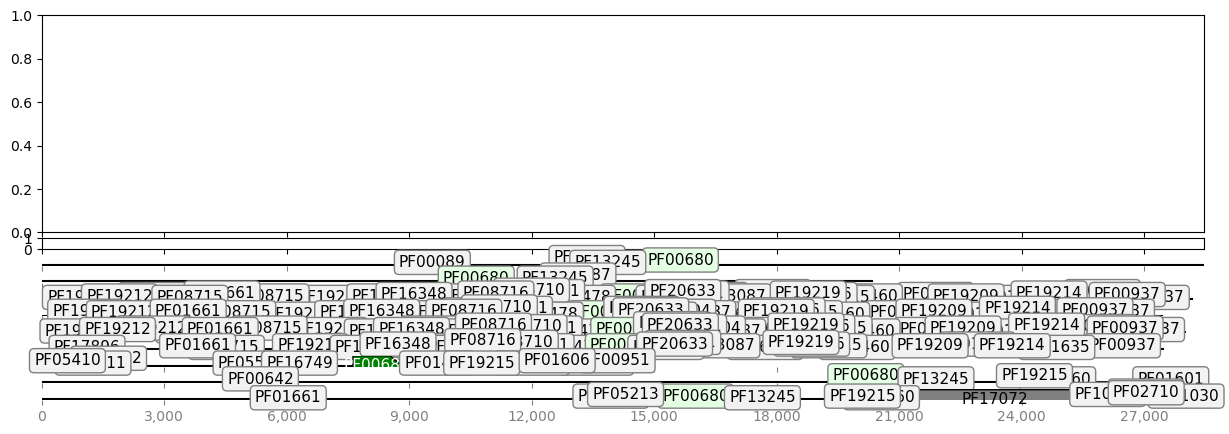

In [10]:
import matplotlib.colors as clr
import matplotlib.patches as patches
figure_width = 15
total_length = 42000
rdrp_fixed_position = 21000 # put the rdrp here 
nb_plots = 10 #poc
fig, subplots  = plt.subplots(
    nb_plots+1, 1, figsize=(figure_width, 3+.2*nb_plots), sharex=True, gridspec_kw={'height_ratios': [20] +[1]*nb_plots })
subplot_i = 1
sc2_virtual_track = []

    
    

c=0
# subplot_i
for i in domains.groupby('genome_name'):
    sequence_length=i[1].iloc[0]['genome_length']
    features=[]
    for _,d in i[1].iterrows():
        strand=+1 if d['strand']=='SENSE' else -1
        color= 'green' if d['domain_accession']=='PF00680' else 'grey'
        features.append(GraphicFeature(start=d['start'], end=d['end'], strand=strand, color=color,
                    label=d['domain_accession']))
    record = GraphicRecord(sequence_length=sequence_length, features=features)
    ax, _ = record.plot(ax=subplots[subplot_i+1],figure_width=figure_width)
    ax.set_facecolor("white")
    ax.annotate('xx', (-2300,-0.1), xycoords='data', annotation_clip=False) 
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # remove ticks
    genome_start_pos = rdrp_fixed_position - [x[0] for x in sars_cov_2_features if "RdRP" in x[3]][0]
    genome_end_pos = genome_start_pos + 29903
    hide_axes(ax,genome_start_pos,genome_end_pos)
    subplot_i+=1
    c+=1
    if c>nb_plots:
        break

# for _,i in domains[domains['domain_accession']=='PF00680'].iterrows():
#     i:pd.Series
#     start,end,strand,name,genome,osef = (i['start'],
#             i['end'],i['strand'],
#             i['genome_name'].split('|')[0],
#             i['genome_name'].split('|')[-1],
#             True
#             )
#     strand=+1 if strand=='SENSE' else -1
#     rdrp_offset = rdrp_fixed_position - i['end']
#     start, end = start+rdrp_offset, end+rdrp_offset # apply offset to line up rdrp's
#     color = dpalette.get(name,'grey')
#     textcolor = get_foreground(clr.to_hex(color))
#     sc2_virtual_track += [GraphicFeature(start=start, end=end, strand=strand, color = color, \
#                                         linewidth=0, label=name, thickness=7, box_color=color, box_linewidth=0,
#                                         label_link_color='white',
#                                         fontdict={"size":8,"color":textcolor})]

# for virtual_track, v_subplot_i, annotation in [
#     (sc2_virtual_track,  0,          "SARS-CoV-2"), 
#      #(nido_virtual_track, nb_plots+1, "Nido HMM")
#     ]:
#     record = GraphicRecord(sequence_length=total_length, feature_level_height=1, features=virtual_track)
#     ax, _ = record.plot(ax=subplots[v_subplot_i])#  ,figure_width=figure_width
#     ax.set_facecolor("white")
#     ax.annotate(annotation, (-2300,-0.1), xycoords='data', annotation_clip=False) #https://stackoverflow.com/questions/18537879/matplotlib-how-to-write-annotation-outside-the-drawing-in-data-coords
#     ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # remove ticks
#     genome_start_pos = rdrp_fixed_position - - i['end']
#     genome_end_pos = genome_start_pos + 29903
#     hide_axes(ax,genome_start_pos,genome_end_pos)

In [5]:
domains['genome_length'].max()

41178

(<Axes: >,
 ({GF(Small feature, 0-20 (1)): 0,
   GF(Gene 1 with a very long name, 20-500 (1)): 0,
   GF(Gene 2, 400-700 (-1)): 1.0,
   GF(Gene 3, 600-900 (1)): 0},
  {GF(Gene 1 with a very long name, 20-500 (1)): {'feature_y': 0,
    'annotation_y': 2.0},
   GF(Small feature, 0-20 (1)): {'feature_y': 0, 'annotation_y': 1.0}}))

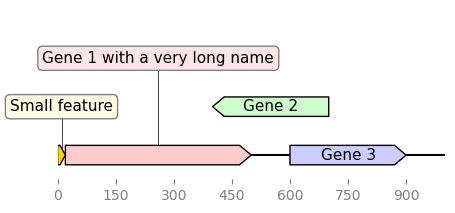

In [24]:

# features=[
#     GraphicFeature(start=0, end=20, strand=+1, color="#ffd700",
#                    label="Small feature"),
#     GraphicFeature(start=20, end=500, strand=+1, color="#ffcccc",
#                    label="Gene 1 with a very long name"),
#     GraphicFeature(start=400, end=700, strand=-1, color="#cffccc",
#                    label="Gene 2"),
#     GraphicFeature(start=600, end=900, strand=+1, color="#ccccff",
#                    label="Gene 3")
# ]
# record = GraphicRecord(sequence_length=1000, features=features)
# record.plot(figure_width=5)
